In [1]:
# Standard libraries
import os
import random

# Third-party libraries
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - General
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

# Statistics and Model Evaluation
import statsmodels.api as sm
from scipy.stats import expon, reciprocal

# Visualisation for Machine Learning
from yellowbrick.cluster import KElbowVisualizer

# Neural Networks and Deep Learning
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

# Hyperparameter Tuning
import kerastuner as kt

# Model Interpretability
import shap

# Local application/library specific imports
from collections import defaultdict
from kedro.pipeline import node

2023-12-12 23:38:18.557565: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-12 23:38:18.806090: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-12 23:38:18.808718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-12 23:38:19.990988: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[12/12/23 23:38:20] WARNING  /tmp/ipykernel_6690/105963161.py:48: DeprecationWarning: `import       ]8;id=296441;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=145513;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             kerastuner` is deprecated, please use `import keras_tuner`.                           
                               import kerastuner as kt                                                             
                                                                                                                   

In [2]:
%reload_kedro

[12/12/23 23:38:21] INFO     Resolved project path as:                                              ]8;id=551810;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=580064;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/joelmashana/IRP/joel-mashana-dissertation-project.                              
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/12/23 23:38:22] INFO     Kedro project Joel Mashana Dissertation Project                        ]8;id=386596;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=490588;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=457034;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=486718;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=127257;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=909461;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [3]:
X_train = catalog.load("X_train_main")
y_train = catalog.load("y_train_main")
X_validate = catalog.load("X_validate_main")
y_validate = catalog.load("y_validate_main")
decision_tree_params = catalog.load("params:decision_tree")

                    INFO     Loading data from 'X_train_main' (CSVDataSet)...                   ]8;id=148491;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=776283;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'y_train_main' (CSVDataSet)...                   ]8;id=869625;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=748806;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'X_validate_main' (CSVDataSet)...                ]8;id=296625;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=473835;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'y_validate_main' (CSVDataSet)...                ]8;id=378736;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=215601;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'params:decision_tree' (MemoryDataset)...        ]8;id=620362;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=18356;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\

In [4]:
### Evaluation ##########################################################

def print_model_name(model_name):
    print(f"Evaluation Metrics: {model_name}")

def calculate_accuracy(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    return accuracy

def store_and_print_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification Report:\n{report}")
    return report

def print_and_return_confusion_matrix(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{matrix}")
    return matrix

def print_and_return_f1_score(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1}")
    return f1

def print_and_return_precision(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision}")
    return precision

def print_and_return_recall(y_test, y_pred):
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall}")
    return recall

def print_auc(model, X_test, y_test):
    """
    Prints the AUC for the given model and test data.
    """
    # Probabilities for the positive class
    probas = model.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, probas)

    print(f"AUC: {roc_auc}")
    return roc_auc

def print_auc_tf(model, X_test, y_test):
    """
    Prints the AUC for the given model and test data.
    """
    # Probabilities for the positive class
    probas = model.predict(X_test).ravel()

    roc_auc = roc_auc_score(y_test, probas)

    print(f"AUC: {roc_auc}")
    return roc_auc


def get_best_hyperparameters_decision_tree(grid_search): # Main Support
    best_params = grid_search.best_params_

    print(best_params)
    best_hyperparameters_df = pd.DataFrame(best_params, index=[0])

    return best_hyperparameters_df



In [6]:
def train_decision_tree_with_grid_search(X_train, y_train, X_validate, y_validate, model_name): # Main Function   

    param_grid = {
        "decisiontreeclassifier__max_depth": [20],
        "decisiontreeclassifier__min_samples_split": range(10, 38),
        "decisiontreeclassifier__min_samples_leaf": range(33, 43),
        "decisiontreeclassifier__criterion": ["entropy"]
    }

    pipeline = make_pipeline_imb(StandardScaler(), SMOTE(random_state=42), 
                                 DecisionTreeClassifier(random_state=42))
    
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_validate)

    print_model_name(model_name)
    accuracy = calculate_accuracy(y_validate, predictions)
    auc = print_auc(best_model, X_validate, y_validate)
    f1 = print_and_return_f1_score(y_validate, predictions)
    precision = print_and_return_precision(y_validate, predictions)
    recall = print_and_return_recall(y_validate, predictions)

    

    # Get hyperparameter ranges
    best_params_df = get_best_hyperparameters_decision_tree(grid_search)
    confusion_matrix_values = print_and_return_confusion_matrix(y_validate, predictions)
#     f1 = print_and_return_f1_score(y_validate, predictions)
#     precision = print_and_return_precision(y_validate, predictions)
#     recall = print_and_return_recall(y_validate, predictions)

    tn, fp, fn, tp = confusion_matrix_values.ravel()


    # Store actual max depth 
    actual_max_depth = grid_search.best_estimator_.named_steps['decisiontreeclassifier']
    actual_max_depth = actual_max_depth.tree_.max_depth

    print('Decision Tree depth:', actual_max_depth)
    


    extracted_model = best_model.named_steps['decisiontreeclassifier']
    explainer = shap.Explainer(extracted_model, X_train)
    
    
    shap_values = explainer(X_train)
    print(type(shap_values))
    print(shap_values.shape)
    


    return {
        'shap_values': shap_values,
        'expected_value': explainer.expected_value
    }



In [7]:
results = train_decision_tree_with_grid_search(X_train, y_train, X_validate, y_validate, "decision_tree")
shap_values = results['shap_values']
expected_value = results['expected_value']

Fitting 10 folds for each of 280 candidates, totalling 2800 fits
Evaluation Metrics: decision_tree
Accuracy: 0.7358101135190919
AUC: 0.7682775543216893
F1 Score: 0.8098068350668647
Precision: 0.8596214511041009
Recall: 0.7654494382022472
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__min_samples_leaf': 42, 'decisiontreeclassifier__min_samples_split': 10}
Confusion Matrix:
[[545 167]
 [ 89 168]]
Decision Tree depth: 16
<class 'shap._explanation.Explanation'>
(2907, 15, 2)


Class 0 SHAP Values:


[12/13/23 00:00:39] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=137432;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=344689;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=168093;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=402000;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=839133;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=18345;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=138339;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=293668;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=245657;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=525673;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=72936;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939011;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=744253;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=290173;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=279406;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=798487;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=982952;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=740002;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=366701;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=473782;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=870744;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=707611;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=877068;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=82035;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=157528;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458524;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=618010;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=423218;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=126617;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=335001;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=775209;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662982;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=755543;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=876647;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=921876;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=661591;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=115931;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=609752;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=189331;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=906949;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=405352;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=89839;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=312599;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412891;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=141084;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=469102;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=16816;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=13258;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=691835;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=77316;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=196821;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=164538;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=90593;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758292;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

[12/13/23 00:00:40] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=52961;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=79023;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=814422;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=162706;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=332676;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=356814;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=823502;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=806266;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=768353;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698463;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=670888;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=517043;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=282761;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=863059;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=980292;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=444130;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=166316;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836300;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=747173;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=949129;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=694887;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970413;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=38622;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=358040;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=411122;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=425126;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=989070;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=141047;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=627787;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=556532;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=683288;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623704;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=801256;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=605195;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=823674;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=329406;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=29498;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=748275;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=804167;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851186;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=424323;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=164452;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=601850;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=638270;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=243123;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=887271;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=113579;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=500282;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=402960;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=803521;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=385557;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=862453;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=699512;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=622735;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=215326;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259409;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=538204;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=249086;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=185574;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=24825;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=241559;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=636855;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=119126;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=25586;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=993064;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=347113;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=756477;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=918632;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=624686;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458844;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=434700;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=609978;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=287234;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=96053;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=452231;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=38216;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=907607;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412780;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=958680;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=170740;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=598520;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=708557;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=80967;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=321606;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=642987;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=212013;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=906850;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=777769;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=796478;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=728609;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

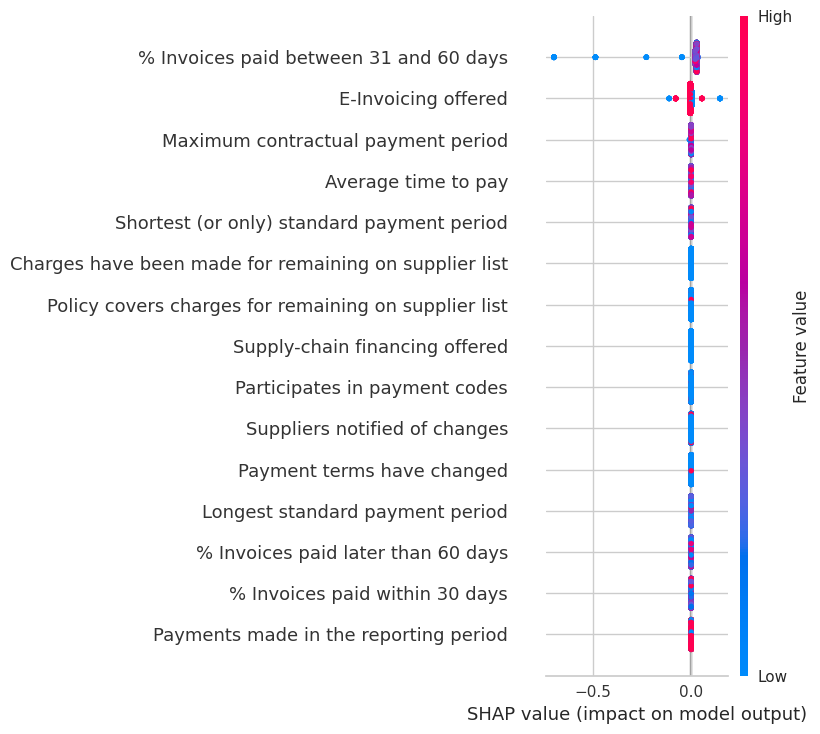

Class 1 SHAP Values:


                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=375520;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=681689;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=970357;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=380806;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=344236;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=986393;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=945139;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=9468;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=373105;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=925323;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=337273;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=996113;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=938550;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=948583;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=703221;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=570018;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=847239;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=202263;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=226623;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=707906;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=623912;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928931;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=870806;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=249791;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=969257;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=725602;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=330143;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68961;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=11298;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=194547;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=735701;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=859329;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=405048;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=781214;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=293538;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716625;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=514076;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=110926;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=763816;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97966;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=255821;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=347990;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=105397;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588145;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=84826;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=876604;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=92833;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=333611;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=746918;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=630512;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=889315;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505853;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=490758;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=146430;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=803537;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=541752;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=649282;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=912981;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=929546;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=72525;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=995401;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=976576;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=958320;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=577186;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=826926;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=998720;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=180175;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=478120;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=868184;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606660;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=767468;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=253383;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=190220;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=887031;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=323137;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=989974;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=745893;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=942430;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=121334;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=381207;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=999620;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201344;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=723368;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=66104;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=473395;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=456901;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=309969;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=638902;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=422953;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=253977;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

[12/13/23 00:00:41] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=196096;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=616079;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=184740;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=349568;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=500260;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=905760;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=674026;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=300647;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=316223;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=592966;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=200397;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=100815;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=463760;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=547861;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=265448;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=948815;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=840232;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=567515;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=811588;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=52911;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=974779;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=795287;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=216285;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=952373;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=268130;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=385907;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=824306;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=490684;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=449413;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=198265;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=528648;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=19387;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=940155;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=945843;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=89408;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368027;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=967414;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=964532;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=86227;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960046;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=606145;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206447;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=521497;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=873625;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=550805;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=670027;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=628190;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=535322;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=807490;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=682409;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=617691;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=280820;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=388882;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=528588;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

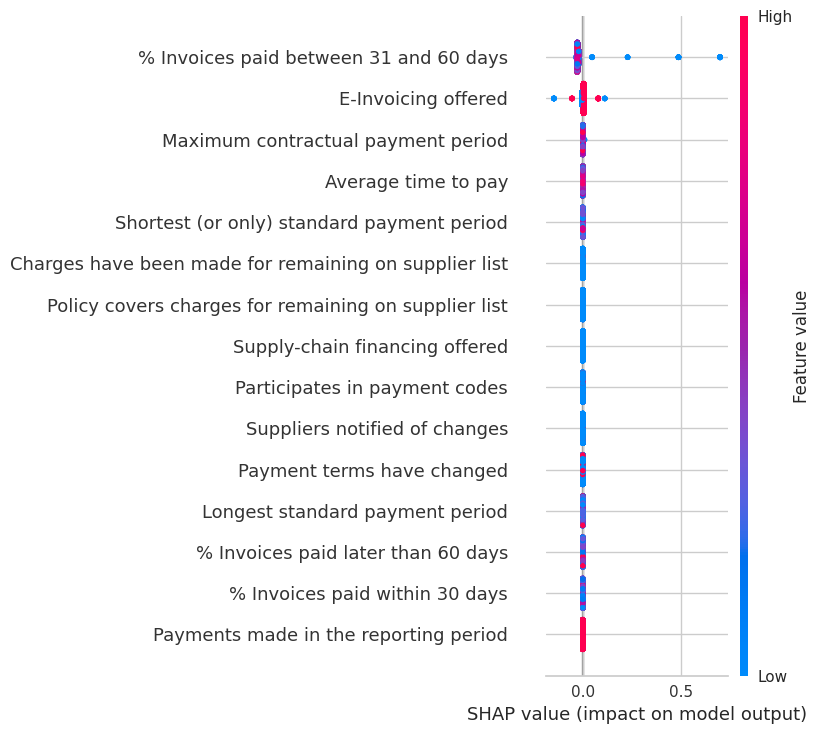

In [9]:
num_classes = shap_values.values.shape[-1]
for i in range(num_classes):
    class_shap_values = shap_values.values[..., i]
    print(f"Class {i} SHAP Values:")
    shap.summary_plot(class_shap_values, X_train)

In [10]:
saved_shap_values = shap_values
saved_expected_value = expected_value

instance_index = 0  
class_index = 0  


[12/13/23 00:00:46] WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=953108;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=607724;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=646844;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557510;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=770881;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=517952;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=543365;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=685861;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=525750;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=419700;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=308114;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=650455;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=31436;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=110108;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=403295;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242267;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=248453;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960278;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=897886;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=896977;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=445397;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947044;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=56172;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=657940;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=193068;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=602846;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=956184;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=950319;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=725147;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=95768;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=929937;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=377115;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=337883;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=98471;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=518910;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=789412;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=875003;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=468905;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=95029;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=277191;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=999865;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=249983;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=691876;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=913680;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=639832;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=37354;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=382469;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=247657;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=277723;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=321447;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=183651;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=305270;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=109159;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=175322;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=484254;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=754770;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=414516;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=284015;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=662002;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=656364;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=762909;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=925391;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=6780;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=811691;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=599838;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=748780;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=94748;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=57428;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=629042;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=795406;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=647156;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=380611;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=816264;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776828;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=447830;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=688314;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=137137;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=616471;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=454388;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=285196;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=928549;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=688002;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=250383;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=364690;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=218569;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=343129;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=247475;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259084;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=192141;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757015;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=740261;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=304299;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=147773;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=852242;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=602407;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332053;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=563245;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=548031;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=517803;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=317188;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=338035;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58474;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=367915;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=67498;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=333031;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=45357;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=3388;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=143481;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=717174;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=22126;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=784998;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962075;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=643445;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=524486;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=797254;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939176;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=187756;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=213127;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=659516;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=353851;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=111519;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668551;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=560870;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=484126;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=135876;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=910179;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=668358;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=26479;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=510948;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750139;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=561133;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85568;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=204703;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=459758;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=56205;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=563969;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=642758;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328878;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=402670;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=689686;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=77805;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142843;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=760292;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=584191;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=160332;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=850778;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=744345;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=547887;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=747533;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=909600;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=674082;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=439639;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=253186;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=13859;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=636981;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=118913;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=463096;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714736;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=929180;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=377284;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=304213;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=547214;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=177469;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=10779;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=484178;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375294;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=455888;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=725426;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=168820;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=930266;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=88931;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=346970;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=400072;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=294884;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=184293;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=759089;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=964608;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=252230;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=427248;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=358241;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=180909;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=994282;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=708917;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=643110;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=196765;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=746191;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=198738;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=436635;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=481481;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375021;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=956516;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=892667;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=295132;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=648094;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=774146;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508823;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=781351;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851319;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=68124;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=395522;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=804545;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=803776;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=905570;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=108086;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=764444;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=361153;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=193581;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=28886;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=382943;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=188074;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=546012;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=861757;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

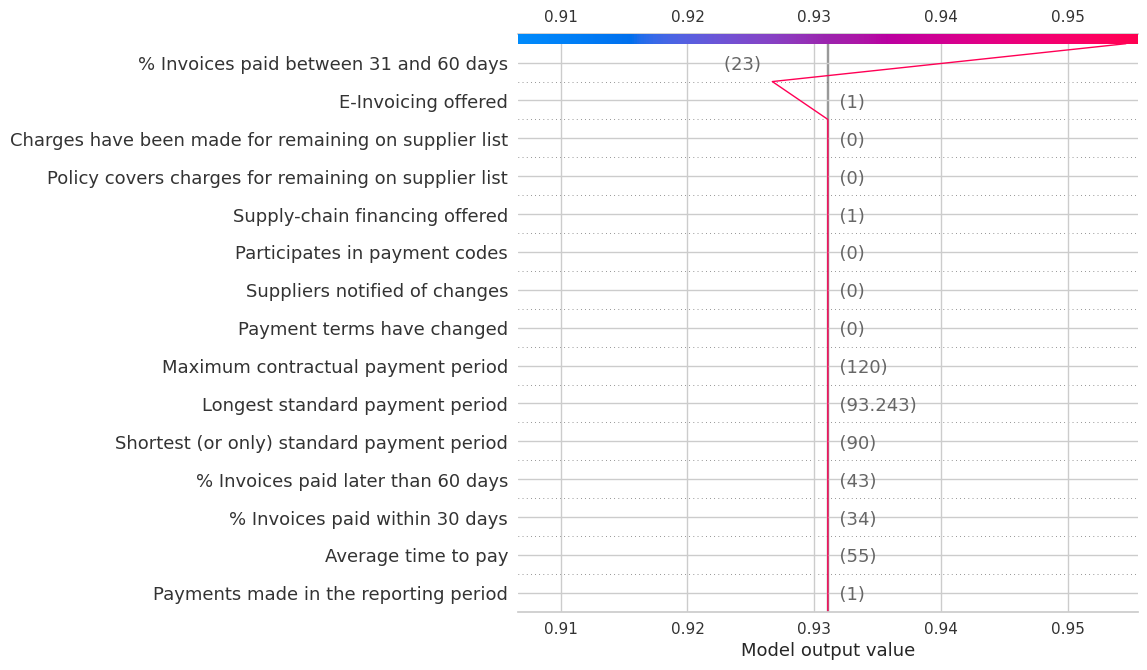

In [11]:
# Ensure that have numpy arrays for the SHAP values
if isinstance(saved_shap_values, shap.Explanation):
    saved_shap_values_array = saved_shap_values.values # Access values if its an explanation object 
else:
    saved_shap_values_array = saved_shap_values

# Pick the expected value for the class 
expected_value_for_class = saved_expected_value[class_index] if isinstance(saved_expected_value, np.ndarray) else saved_expected_value

# Pick the SHAP values for the specific instance and class
shap_values_for_instance_and_class = saved_shap_values_array[instance_index, :, class_index]

# plot
shap.decision_plot(expected_value_for_class, shap_values_for_instance_and_class, X_train.iloc[instance_index, :])
